## Car Brand Predictor using Keras

Used ResNet50 and VGG16 keras application and data is generated from google search  

In [199]:
# importing libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [200]:
# resizing all the images
IMAGE_SIZE = [224, 224]
# setting file path for training and testing
train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [214]:
# Importing the ResNet50 library and adding preprocessing layer to the front of ResNet50
# Using imagenet weights
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# importing VGG16 Library
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [215]:
# Not training existing weights
for layer in vgg.layers:
    layer.trainable = False

In [216]:
# getting number of output classes in our dataset folder
folders = glob('Datasets/train/*')

In [256]:
# Flattening the out of resnet

x = vgg.output
x = Flatten()(x)
#Adding 1024 layer before output layer
#x=Dense(256,activation='relu')(x)




In [257]:
#Creating the output layer
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [258]:
# viewing the structure of the model
model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

#### Last layer has 4 outputs and input layer is images

In [259]:
# Using cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [260]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [261]:
# creating training dataset
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 126 images belonging to 4 classes.


In [262]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 4 classes.


In [263]:
# fitting data to model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Atul\AppData\Local\Temp\ipykernel_380\3051318008.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
4/4 [==============================] - 61s 16s/step - loss: 2.4875 - accuracy: 0.3016 - val_loss: 1.5331 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 58s 16s/step - loss: 1.2476 - accuracy: 0.4762 - val_loss: 1.1468 - val_accuracy: 0.5125
Epoch 3/20
4/4 [==============================] - 58s 16s/step - loss: 0.9191 - accuracy: 0.6349 - val_loss: 0.8584 - val_accuracy: 0.6750
Epoch 4/20
4/4 [==============================] - 58s 16s/step - loss: 0.4926 - accuracy: 0.8095 - val_loss: 0.8816 - val_accuracy: 0.6625
Epoch 5/20
4/4 [==============================] - 58s 16s/step - loss: 0.4902 - accuracy: 0.8016 - val_loss: 0.5781 - val_accuracy: 0.7750
Epoch 6/20
4/4 [==============================] - 58s 16s/step - loss: 0.2084 - accuracy: 0.9841 - val_loss: 0.7255 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 59s 16s/step - loss: 0.1933 - accuracy: 0.9524 - val_loss: 0.5911 - val_accuracy: 0.7375
Epoch 8/20
4/4 [===========

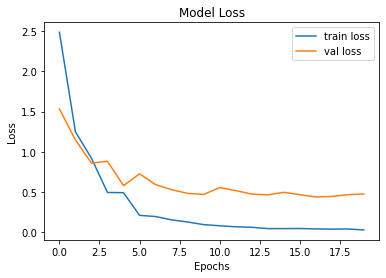

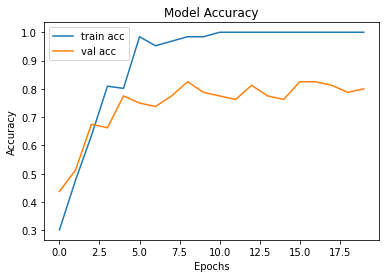

<Figure size 432x288 with 0 Axes>

In [264]:
# ploting the both losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.savefig('AccVal_acc')

#### Since there is large difference in validation accuracy and accuracy values, So added more images to traing datasets

In [265]:
# saving the as a h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg50.h5')

In [316]:
#predicting 4 classes
y_pred = model.predict(test_set)


3/3 [==============================] - 22s 6s/step


In [317]:
y_pred

array([[5.98579459e-03, 9.92087424e-01, 9.69532295e-04, 9.57295648e-04],
       [8.80958792e-03, 3.04372668e-01, 9.78527069e-02, 5.88964999e-01],
       [9.93619502e-01, 8.34265724e-04, 2.76541454e-03, 2.78075319e-03],
       [2.72912960e-02, 3.45709175e-02, 9.08928335e-01, 2.92093586e-02],
       [9.11748095e-04, 3.46850684e-05, 2.75839190e-03, 9.96295154e-01],
       [2.89737363e-04, 9.95793819e-01, 2.21307017e-03, 1.70333253e-03],
       [5.14231205e-01, 1.32908998e-03, 4.66224134e-01, 1.82156283e-02],
       [3.13389814e-03, 9.61448908e-01, 1.07389204e-02, 2.46782787e-02],
       [2.70314310e-02, 9.63142157e-01, 7.43123051e-03, 2.39520287e-03],
       [3.85064334e-01, 1.86987668e-02, 5.43008745e-01, 5.32281473e-02],
       [4.18892682e-01, 1.41393468e-01, 3.50634575e-01, 8.90793055e-02],
       [9.77620482e-04, 9.36897457e-01, 5.77785671e-02, 4.34626220e-03],
       [1.75675020e-01, 8.35346151e-03, 7.02317953e-01, 1.13653585e-01],
       [3.94633114e-01, 4.61045414e-01, 1.67245492e

In [318]:
# Highest prediction value will be the predicted class index
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [319]:
y_pred

array([1, 3, 0, 2, 3, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 3, 1, 2, 0, 2, 1, 0,
       0, 2, 3, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 3, 3, 2, 1, 0, 3, 2, 3,
       2, 0, 0, 1, 2, 0, 3, 1, 1, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2,
       0, 1, 2, 2, 1, 3, 2, 0, 2, 1, 2, 2, 2, 3], dtype=int64)

In [320]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [321]:
#Loading the model
model=load_model('model_vgg50.h5')

### Testing the model

In [322]:
# Taking image from test dataset to test
img=image.load_img('1.jpg',target_size=(224,224))


In [323]:
# Image to array
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [324]:
x.shape

(224, 224, 3)

In [325]:
#re-scaling the testing image

x= x/255

In [326]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [327]:
model.predict(img_data)

1/1 [==============================] - 1s 569ms/step


array([[1.6671326e-04, 1.7596827e-01, 8.2374388e-01, 1.2111240e-04]],
      dtype=float32)

In [328]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 277ms/step


In [329]:
# Checking if the image belongs to lamborgini
a

array([2], dtype=int64)